In [1]:
# All Imports needed for this section of code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in our data (after InitialCleanUp.py, then InitialCleanUp_2.R)
df = pd.read_csv('us_perm_visas.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205533 entries, 0 to 205532
Data columns (total 13 columns):
case_status                205533 non-null object
agent_state                58961 non-null object
case_received_date_YEAR    70261 non-null float64
class_of_admission         194690 non-null object
country_of_citizenship     205503 non-null object
employer_state             205511 non-null object
application_type           135269 non-null object
decision_date              205533 non-null object
education_level            70258 non-null object
job_major                  64085 non-null object
economic_sector            129068 non-null object
ctc                        205476 non-null object
ctc_unit                   160716 non-null object
dtypes: float64(1), object(12)
memory usage: 20.4+ MB


c:\users\justin\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1,6,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Replase NAs with a new categorical value
missing_term = ['cs', 'as', 'crdy', 'coa', 'coc', 'es', 'at', 'dd', 'el', 'jm', 'es', 'ctc', 'ctcu']
for i in range(13):
    df.iloc[:,i].fillna('missing'+missing_term[i], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205533 entries, 0 to 205532
Data columns (total 13 columns):
case_status                205533 non-null object
agent_state                205533 non-null object
case_received_date_YEAR    205533 non-null object
class_of_admission         205533 non-null object
country_of_citizenship     205533 non-null object
employer_state             205533 non-null object
application_type           205533 non-null object
decision_date              205533 non-null object
education_level            205533 non-null object
job_major                  205533 non-null object
economic_sector            205533 non-null object
ctc                        205533 non-null object
ctc_unit                   205533 non-null object
dtypes: object(13)
memory usage: 20.4+ MB


In [4]:
# Print information about the data contained
column_names = df.columns
for i in range(13):
    print(column_names[i])
    print(df.iloc[:,i].value_counts()*100/len(df))
    print("--------------------")

case_status
1            86.318985
0             8.375784
Withdrawn     5.305231
Name: case_status, dtype: float64
--------------------
agent_state
missingas    71.313122
ca            7.661543
ny            3.642237
tx            2.614179
ma            1.571524
il            1.435293
ga            1.424102
mi            1.291763
nj            1.094228
va            1.050926
az            0.950699
pa            0.782843
md            0.722025
fl            0.678723
dc            0.611094
oh            0.510867
nc            0.504542
co            0.291437
mn            0.255920
ct            0.212618
wa            0.193156
mo            0.156179
wi            0.099741
tn            0.097308
ne            0.096335
or            0.094875
la            0.078819
ut            0.054979
sc            0.054492
in            0.047681
al            0.042329
ks            0.041842
ok            0.041842
vt            0.034544
nh            0.030165
ky            0.027733
ia            0.026273
a

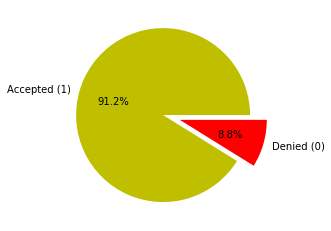

In [5]:
# Plotting pie chart of Accepted vs. Denied cases (ignoring other values)
df = df[df['case_status'] != 'Withdrawn']
df['case_status'].astype(np.int64)

fig, ax = plt.subplots(1,1)
ax.pie(df.case_status.value_counts(),explode=(0,0.2), autopct='%1.1f%%', labels = ['Accepted (1)', 'Denied (0)'], colors=['y','r'])
plt.axis = 'equal'

In [6]:
# Relabel class of admission to H-1B and Other (because most of the data was H-1B)
# 1 for H-1B type of visa and 0 for others
def class_of_admission(x):
    x = str(x)
    if x == 'H-1B' or x =='H1B':
        return 'H-1B'
    else:
        return 'other_coa'
    
df['class_of_admission'] = df['class_of_admission'].apply(lambda x: class_of_admission(x))
df['class_of_admission'].value_counts()*100/len(df)

H-1B         79.259514
other_coa    20.740486
Name: class_of_admission, dtype: float64

In [7]:
# Relabel data from US economic sector into either IT, or Other
def economic_sector(x):
    x = str(x)
    if x == 'missinges' or x == 'IT':
        return x
    else:
        return 'other_es'
    
df['economic_sector'] = df['economic_sector'].apply(lambda x: economic_sector(x))
df['economic_sector'].value_counts()*100/len(df)

missinges    37.898258
other_es     36.765847
IT           25.335895
Name: economic_sector, dtype: float64

In [8]:
# Drop fields we realised we didn't need
df = df.drop(columns = ['agent_state', 'decision_date', 'job_major'])

In [9]:
# What's left is shown.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194629 entries, 0 to 205532
Data columns (total 10 columns):
case_status                194629 non-null object
case_received_date_YEAR    194629 non-null object
class_of_admission         194629 non-null object
country_of_citizenship     194629 non-null object
employer_state             194629 non-null object
application_type           194629 non-null object
education_level            194629 non-null object
economic_sector            194629 non-null object
ctc                        194629 non-null object
ctc_unit                   194629 non-null object
dtypes: object(10)
memory usage: 16.3+ MB


In [10]:
# Typecast data
df[['class_of_admission', 'country_of_citizenship', 'employer_state', 'application_type', 'education_level', 'economic_sector']] = df[['class_of_admission', 'country_of_citizenship', 'employer_state', 'application_type', 'education_level', 'economic_sector']].astype('|S')

In [11]:
# Change the format of the year to 0 if empty
def change_year_format(x):
    if str(x) == 'missingcrdy':
        return 0
    else:
        return np.int64(x)

df['case_received_date_YEAR'] = df['case_received_date_YEAR'].apply(lambda x: change_year_format(x))

In [12]:
# Compute the mean wage
def mean_ctc(array):
    sum_ctc = 0
    count = 0
    for ctc in array:
        ctc = str(ctc)
        try:
            ctc = np.float64(ctc.replace(',',''))
            sum_ctc = sum_ctc + ctc
            count = count + 1
        except:
            continue
    return np.float64(sum_ctc/count)
            
array = df['ctc'].values
mean_ctc = mean_ctc(array)

In [13]:
print(mean_ctc)

93369.5196561726


In [14]:
# Replace our Na values with the mean
def modify_ctc(x):
    try:
        x = str(x) 
        x = x.replace(',','')
        x = np.float64(x)
    except:
        x = mean_ctc
    return x

df['ctc'] = df['ctc'].apply(lambda x: modify_ctc(x))

In [15]:
# Typecast results
df[['case_status', 'ctc']] = df[['case_status', 'ctc']].astype(np.int64)

df = df[(df['ctc_unit'] == 'Year') | (df['ctc_unit'] == 'yr')]
df = df.drop(columns = ['ctc_unit'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149341 entries, 0 to 205531
Data columns (total 9 columns):
case_status                149341 non-null int64
case_received_date_YEAR    149341 non-null int64
class_of_admission         149341 non-null object
country_of_citizenship     149341 non-null object
employer_state             149341 non-null object
application_type           149341 non-null object
education_level            149341 non-null object
economic_sector            149341 non-null object
ctc                        149341 non-null int64
dtypes: int64(3), object(6)
memory usage: 11.4+ MB


In [17]:
# Create our encoders
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
for i in range(2,8):
    label_encoder = label_encoder.fit(df.iloc[:,i].astype(str))
    df.iloc[:,i] = label_encoder.transform(df.iloc[:,i].astype(str))

In [18]:
# remove case_status (the thing we want to estimate) and keep in separate data frame
X = df.drop(columns = ['case_status'])
X = X.values

y = df['case_status'].values

In [19]:
# Create our datasets for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Get our data splits
from collections import Counter
print(Counter(y_test))

Counter({1: 41870, 0: 2933})


In [21]:
# Get our data splits
print(Counter(y_train))

Counter({1: 97416, 0: 7122})


In [22]:
# Create function to score our output after creating a decision tree classifier.
from sklearn.metrics import accuracy_score
def perc_correct(y_true, y_pred):
    count = 0
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == 0:
            count = count + 1
            if y_true[i] == y_pred[i]:
                correct += 1
    return correct*100/count

from sklearn.tree import DecisionTreeClassifier
y_true = y_test

clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, random_state=28).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('perc_correct>> ',perc_correct(y_true, y_pred))
print('accuracy_Score>> ', accuracy_score(y_true, y_pred)*100)

perc_correct>>  7.057620184111831
accuracy_Score>>  93.71693859786176


In [23]:
df_undersample = df
df_undersample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149341 entries, 0 to 205531
Data columns (total 9 columns):
case_status                149341 non-null int64
case_received_date_YEAR    149341 non-null int64
class_of_admission         149341 non-null int32
country_of_citizenship     149341 non-null int32
employer_state             149341 non-null int32
application_type           149341 non-null int32
education_level            149341 non-null int32
economic_sector            149341 non-null int32
ctc                        149341 non-null int64
dtypes: int32(6), int64(3)
memory usage: 8.0 MB


In [24]:
# Create two new datasets containing our Denied cases
dfu_0 = df_undersample[df_undersample['case_status'] == 0]
dfu_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10055 entries, 1 to 205379
Data columns (total 9 columns):
case_status                10055 non-null int64
case_received_date_YEAR    10055 non-null int64
class_of_admission         10055 non-null int32
country_of_citizenship     10055 non-null int32
employer_state             10055 non-null int32
application_type           10055 non-null int32
education_level            10055 non-null int32
economic_sector            10055 non-null int32
ctc                        10055 non-null int64
dtypes: int32(6), int64(3)
memory usage: 549.9 KB


In [25]:
# Create two new datasets containing our Accepted cases
dfu_1 = df_undersample[df_undersample['case_status'] == 1]
dfu_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139286 entries, 0 to 205531
Data columns (total 9 columns):
case_status                139286 non-null int64
case_received_date_YEAR    139286 non-null int64
class_of_admission         139286 non-null int32
country_of_citizenship     139286 non-null int32
employer_state             139286 non-null int32
application_type           139286 non-null int32
education_level            139286 non-null int32
economic_sector            139286 non-null int32
ctc                        139286 non-null int64
dtypes: int32(6), int64(3)
memory usage: 7.4 MB


In [26]:
# Using the previous two created datasets, create a new data split
y0 = dfu_0['case_status'].values
x0 = dfu_0.drop(columns = ['case_status']).values

X_train0, X_test0, y_train0, y_test0 = train_test_split(x0, y0, test_size=0.3, random_state=42)


In [27]:
print(len(y_train0)) 

7038


In [28]:
# Create test splits with differring proportions of Accepted to Denied cases (1:1 and up) and plot
# Our accuracies at each ratio

from sklearn.metrics import accuracy_score
dt_perc_correct_array = []
dt_accuracy_score_array = []
dt_sample_array = []

for i in range(7000, 40000, 200):
    dfu_11 = dfu_1.sample(n=i, random_state=28)
    y1 = dfu_11['case_status'].values
    x1 = dfu_11.drop(columns = ['case_status']).values

    X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
    
    y_train0 = y_train0.reshape(len(X_train0),1)
    y_train1 = y_train1.reshape(len(X_train1), 1)    

    training_set_0 = np.hstack((X_train0, y_train0))
    training_set_1 = np.hstack((X_train1, y_train1))
    training_set = np.vstack((training_set_0, training_set_1))

    np.random.shuffle(training_set)
    
    y_test0 = y_test0.reshape(len(X_test0),1)
    y_test1 = y_test1.reshape(len(X_test1), 1) 

    testing_set_0 = np.hstack((X_test0, y_test0))
    testing_set_1 = np.hstack((X_test1, y_test1))

    testing_set = np.vstack((testing_set_0, testing_set_1))
    np.random.shuffle(testing_set)
    
    X_train = training_set[:,0:8]
    y_train = training_set [:,8]

    X_test = testing_set[:, 0:8]
    y_test = testing_set [:, 8]
    
    y_true = y_test
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=28).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    dt_perc_correct_array.append(perc_correct(y_true, y_pred))
    dt_accuracy_score_array.append(accuracy_score(y_true, y_pred)*100)
    dt_sample_array.append(i)

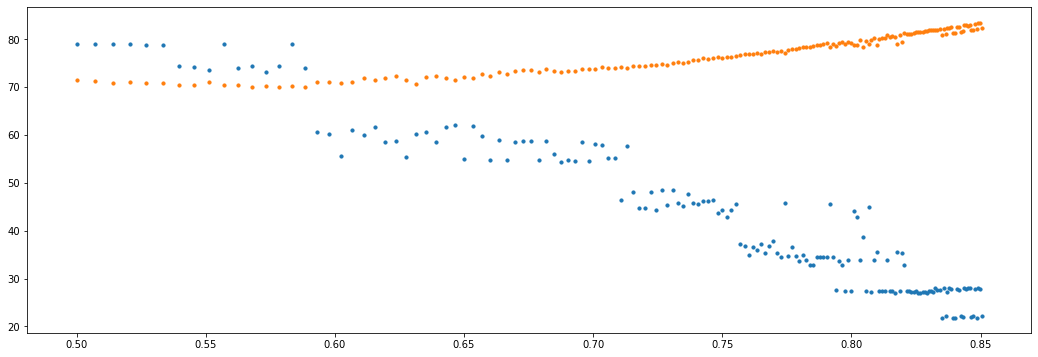

In [29]:
# Plot our data and performance
import matplotlib.pyplot as plt

for i in range(len(dt_sample_array)):
    dt_sample_array[i] = dt_sample_array[i]/(7000+dt_sample_array[i])
plt.figure(figsize = (18,6))
plt.scatter(dt_sample_array, dt_perc_correct_array, s = 10)
plt.scatter(dt_sample_array, dt_accuracy_score_array, s = 10)

plt.show()

In [30]:
# pip install pydotplus # We initially though making a decision tree plot would be interesting... we removed it

In [31]:
# Create our decision tree and test
dfu_11 = dfu_1.sample(n=10000, random_state=28)
y1 = dfu_11['case_status'].values
x1 = dfu_11.drop(columns = ['case_status']).values

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
    
y_train0 = y_train0.reshape(len(X_train0),1)
y_train1 = y_train1.reshape(len(X_train1), 1)    

training_set_0 = np.hstack((X_train0, y_train0))
training_set_1 = np.hstack((X_train1, y_train1))
training_set = np.vstack((training_set_0, training_set_1))

np.random.shuffle(training_set)
    
y_test0 = y_test0.reshape(len(X_test0),1)
y_test1 = y_test1.reshape(len(X_test1), 1) 

testing_set_0 = np.hstack((X_test0, y_test0))
testing_set_1 = np.hstack((X_test1, y_test1))

testing_set = np.vstack((testing_set_0, testing_set_1))
np.random.shuffle(testing_set)
    
X_train = training_set[:,0:8]
y_train = training_set [:,8]

X_test = testing_set[:, 0:8]
y_test = testing_set [:, 8]
    
y_true = y_test
clf_DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=28).fit(X_train, y_train)


In [32]:
# Plotting of the decision tree, but it required the graphiz libraries and we were afraid that might be too much to install
# Just for a plot of our decision tree (it wasn't very useful anyways)

# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf_DT, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.set_size('"500,200!"')
# Image(graph.create_png())


In [33]:
# Trying out a random forest classifier to classify our data

from sklearn.ensemble import RandomForestClassifier

rfc_perc_correct_array = []
rfc_accuracy_score_array = []
rfc_n_estimator_array = []


for i in range(10,25):
    dfu_11 = dfu_1.sample(n=10000, random_state=28)
    y1 = dfu_11['case_status'].values
    x1 = dfu_11.drop(columns = ['case_status']).values

    X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
    
    y_train0 = y_train0.reshape(len(X_train0),1)
    y_train1 = y_train1.reshape(len(X_train1), 1)    

    training_set_0 = np.hstack((X_train0, y_train0))
    training_set_1 = np.hstack((X_train1, y_train1))
    training_set = np.vstack((training_set_0, training_set_1))

    np.random.shuffle(training_set)
    
    y_test0 = y_test0.reshape(len(X_test0),1)
    y_test1 = y_test1.reshape(len(X_test1), 1) 

    testing_set_0 = np.hstack((X_test0, y_test0))
    testing_set_1 = np.hstack((X_test1, y_test1))

    testing_set = np.vstack((testing_set_0, testing_set_1))
    np.random.shuffle(testing_set)
    
    X_train = training_set[:,0:8]
    y_train = training_set [:,8]

    X_test = testing_set[:, 0:8]
    y_test = testing_set [:, 8]
    
    y_true = y_test
    clf_RFC = RandomForestClassifier(n_estimators = i, criterion = 'entropy', max_depth = 5, random_state=28).fit(X_train, y_train)
    y_pred = clf_RFC.predict(X_test)
    
    rfc_perc_correct_array.append(perc_correct(y_true, y_pred))
    rfc_accuracy_score_array.append(accuracy_score(y_true, y_pred)*100)
    rfc_n_estimator_array.append(i)
    
print(rfc_accuracy_score_array)

[71.01545620741233, 71.06531494100051, 70.4670101379425, 70.915738740236, 72.57769652650823, 71.14841283031411, 70.21771647000166, 72.22868539139105, 71.29798903107861, 70.317433937178, 71.24813029749045, 71.96277214558751, 70.68306465015789, 70.68306465015789, 71.94615256772478]


In [34]:
# Trying out an SVM at different kernels and testing its performance
from sklearn.svm import SVC

svm_kernels = ['rbf','linear','poly','sigmoid']
svm_kernel_accuracy_score = []
svm_kernel_perc_accuracy = []

for kernel_ii in svm_kernels:
    dfu_11 = dfu_1.sample(n=10000, random_state=28)
    y1 = dfu_11['case_status'].values
    x1 = dfu_11.drop(columns = ['case_status']).values

    X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
    
    y_train0 = y_train0.reshape(len(X_train0),1)
    y_train1 = y_train1.reshape(len(X_train1), 1)    

    training_set_0 = np.hstack((X_train0, y_train0))
    training_set_1 = np.hstack((X_train1, y_train1))
    training_set = np.vstack((training_set_0, training_set_1))

    np.random.shuffle(training_set)
    
    y_test0 = y_test0.reshape(len(X_test0),1)
    y_test1 = y_test1.reshape(len(X_test1), 1) 

    testing_set_0 = np.hstack((X_test0, y_test0))
    testing_set_1 = np.hstack((X_test1, y_test1))

    testing_set = np.vstack((testing_set_0, testing_set_1))
    np.random.shuffle(testing_set)
    
    X_train = training_set[:,0:8]
    y_train = training_set [:,8]

    X_test = testing_set[:, 0:8]
    y_test = testing_set [:, 8]
    
    y_true = y_test
    clf_SVC = SVC(gamma = 'auto', kernel = kernel_ii).fit(X_train, y_train)

    y_predict = clf_SVC.predict(X_test)


    svm_kernel_perc_accuracy.append(perc_correct(y_true, y_pred))
    svm_kernel_accuracy_score.append(accuracy_score(y_true, y_pred)*100)
    
    print(svm_kernel_accuracy_score)

[49.7423965431278]
[49.7423965431278, 48.94465680571714]
[49.7423965431278, 48.94465680571714, 49.67591823167691]
[49.7423965431278, 48.94465680571714, 49.67591823167691, 49.70915738740236]


In [35]:
# Trying a logistic regression as well

from sklearn.linear_model import LogisticRegression as LR

lr_solvers = ['newton-cg','liblinear','sag','saga']
lr_solver_perc_accuracy = []
lr_solver_accuracy_score = []

for solver_ii in lr_solvers:
    dfu_11 = dfu_1.sample(n=10000, random_state=28)
    y1 = dfu_11['case_status'].values
    x1 = dfu_11.drop(columns = ['case_status']).values

    X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
    
    y_train0 = y_train0.reshape(len(X_train0),1)
    y_train1 = y_train1.reshape(len(X_train1), 1)    

    training_set_0 = np.hstack((X_train0, y_train0))
    training_set_1 = np.hstack((X_train1, y_train1))
    training_set = np.vstack((training_set_0, training_set_1))

    np.random.shuffle(training_set)
    
    y_test0 = y_test0.reshape(len(X_test0),1)
    y_test1 = y_test1.reshape(len(X_test1), 1) 

    testing_set_0 = np.hstack((X_test0, y_test0))
    testing_set_1 = np.hstack((X_test1, y_test1))

    testing_set = np.vstack((testing_set_0, testing_set_1))
    np.random.shuffle(testing_set)
    
    X_train = training_set[:,0:8]
    y_train = training_set [:,8]

    X_test = testing_set[:, 0:8]
    y_test = testing_set [:, 8]
    
    y_true = y_test
    clf_LR = LR(random_state=0, solver=solver_ii).fit(X_train, y_train)

    y_predict = clf_LR.predict(X_test)


    lr_solver_perc_accuracy.append(perc_correct(y_true, y_pred))
    lr_solver_accuracy_score.append(accuracy_score(y_true, y_pred)*100)

    print(lr_solver_accuracy_score)


c:\users\justin\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\justin\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\justin\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\justin\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\justin\appdata\local\progra

[49.90859232175503]
[49.90859232175503, 50.24098387900947]


c:\users\justin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[49.90859232175503, 50.24098387900947, 49.67591823167691]
[49.90859232175503, 50.24098387900947, 49.67591823167691, 50.37394050191125]


c:\users\justin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
